Load Libraries 

In [1]:
#Loading Libraries/Dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import nltk
import matplotlib
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import warnings
warnings.simplefilter("ignore")

import nltk
from matplotlib import pyplot as plt
import csv
import re

# Importing Dataset

In [2]:
# Load the Nigerian Election CSV dataset
df = pd.read_csv("nigerian_presidential_election_2023_tweets.csv")

In [3]:
print("Shape of data=>",df.shape)

Shape of data=> (78946, 16)


In [4]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False


In [5]:
# Check for missing values
print(df.isnull().sum())

id                      2
user_name               5
user_location       20316
user_description     7201
user_created           11
user_followers         11
user_friends           11
user_favourites        11
user_verified          13
date                   13
text                   11
hashtags            36481
source                 11
retweets               16
favorites              18
is_retweet             18
dtype: int64


In [6]:
#Dropping missing values 
df = df.dropna(axis='index', how='any', subset=['user_name','user_followers','user_friends','user_favourites','text','retweets','favorites'])

In [7]:
# Re-Checking for missing values
print(df.isnull().sum())

id                      0
user_name               0
user_location       20310
user_description     7195
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            36470
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64


In [8]:
# Check data types of columns
print(df.dtypes)

id                   object
user_name            object
user_location        object
user_description     object
user_created         object
user_followers       object
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
retweets             object
favorites           float64
is_retweet           object
dtype: object


In [9]:
df['user_followers'] = df['user_followers'].astype(float)
df['user_friends'] = df['user_friends'].astype(float)
df['user_favourites'] = df['user_favourites'].astype(float)
df['retweets'] = df['retweets'].astype(float)
df['favorites'] = df['favorites'].astype(float)
df['is_retweet'] = df['is_retweet'].astype(float)
df['user_created'] = pd.to_datetime(df['user_created'])
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Re-Checking data types of columns
print(df.dtypes)

id                               object
user_name                        object
user_location                    object
user_description                 object
user_created        datetime64[ns, UTC]
user_followers                  float64
user_friends                    float64
user_favourites                 float64
user_verified                    object
date                datetime64[ns, UTC]
text                             object
hashtags                         object
source                           object
retweets                        float64
favorites                       float64
is_retweet                      float64
dtype: object


In [11]:
#Checking for unique values on the dataframes
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,78928,78928,58618,71733,78928,78928,78928,78928,78928,78928,78928,42458,78928,78928,78928,78928
Uniques,77726,31117,6781,29043,31508,9186,5841,18557,2,73738,76735,14293,183,924,1274,1


In [12]:
#Checking for the most frequent post
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,78928,78928,58618,71733,78928,78928,78928,78928,78928,78928,78928,42458,78928,78928,78928,78928
Most frequent item,1632844760997154816.0,234𝐑𝐚𝐝𝐢𝐨 🌍,Nigeria,Africa’s premium internet radio. \nYour one-st...,2013-07-17 16:30:59+00:00,3.0,1155.0,8.0,False,2023-02-25 19:32:29+00:00,"Good evening, remember to vote Labour Party at...",['NigeriaDecides2023'],Twitter for Android,0.0,0.0,0.0
Frequence,2,3588,8250,3588,3588,838,1020,2228,75388,5,17,10453,41213,55054,40276,78928
Percent from total,0.003,4.546,14.074,5.002,4.546,1.062,1.292,2.823,95.515,0.006,0.022,24.62,52.216,69.752,51.029,100.0


# # Data Preprocessing / Cleaning

In [13]:
# Function to clean and preprocess the tweet(text)
def clean_text(text):
    # Replace user mentions with 'user'
    text = re.sub(r'@[^\s]+', 'user', text)
    
    # Remove URLs (http)
    text = re.sub(r'http\S+', 'http', text)
    
    # Remove hashtags
    text = re.sub(r'#', '', text)
    
    # Remove newline characters
    text = text.replace('\n', '')
    
    # Convert to lowercase
    text = text.lower()
    
    return text


# Apply the preprocessing function to each tweet in the DataFrame
df['preprocessed_text'] = df['text'].apply(clean_text)

In [14]:
from nltk.tokenize import word_tokenize

# Tokenize the text and create a new column for tokens
df['tokens'] = df['preprocessed_text'].apply(word_tokenize)


# # Classification of Tweets to each Candidate 

In [20]:
import pandas as pd
import re

# Assuming df is already defined

def check_candidate_mention(tweet_text, username):
    candidates = {
        'obi': ['obi', 'peter obi', 'obidient', 'po', 'lp', 'Labour Party', 'obidatti', 'peterobi4president2023', 'obidatti2023', 'obidientmovement'],
        'atiku': ['atiku', 'atiku abubakar', 'atikulated', 'pdp', 'peoples democratic party', 'officialpdpnig', 'okowa', 'atikuokowa'],
        'tinubu': ['tinubu', 'bola ahmed tinubu', 'batified', 'apc', 'all progressives party', 'asiwaju', 'jagaban', 'bat', 'tinubushettima2023', 'officialabat']
    }

    mentioned_candidates = []

    # Check for mention of each candidate and their slogans in the tweet text
    for candidate, slogans in candidates.items():
        if re.search(r'\b' + re.escape(candidate) + r'\b', tweet_text, flags=re.IGNORECASE) or any(
                re.search(r'\b' + re.escape(slogan) + r'\b', tweet_text, flags=re.IGNORECASE) for slogan in slogans):
            mentioned_candidates.append(candidate)

    # Check if the username is a candidate
    for candidate in candidates:
        if re.search(r'\b' + re.escape(candidate) + r'\b', username, flags=re.IGNORECASE):
            mentioned_candidates.append(candidate)

    if mentioned_candidates:
        return mentioned_candidates[0]
    else:
        return 'Neutral'

# Apply the function to the 'preprocessed_text' and 'username' columns to create a new 'candidate' column
df['candidate'] = df.apply(lambda row: check_candidate_mention(row['preprocessed_text'], row['user_name']), axis=1)

# Create a new dataframe with the relevant columns
result_df = df[['preprocessed_text', 'user_name', 'candidate']]

print(result_df)


                                       preprocessed_text           user_name  \
0      obi and wife storm kastina state today.see cro...       Fabulous Faga   
1      if they can’t point to you one project , inves...  Patriotic Nigerian   
2      user god with his infinite mercy will never al...             Promise   
3      governor user takes asiwaju bola ahmed tinubu'...              KemKem   
4             user salutation is not love. obi is coming            Mo'6icky   
...                                                  ...                 ...   
78941  from mobile banking to e-learning, digital inn...      Atiku Abubakar   
78942  in nigeria, women face numerous challenges, in...      Atiku Abubakar   
78943  today, we recognise the potential of technolog...      Atiku Abubakar   
78944  i join women around the world and particularly...      Atiku Abubakar   
78945  today, i led a peaceful protest to the headqua...      Atiku Abubakar   

      candidate  
0           obi  
1  

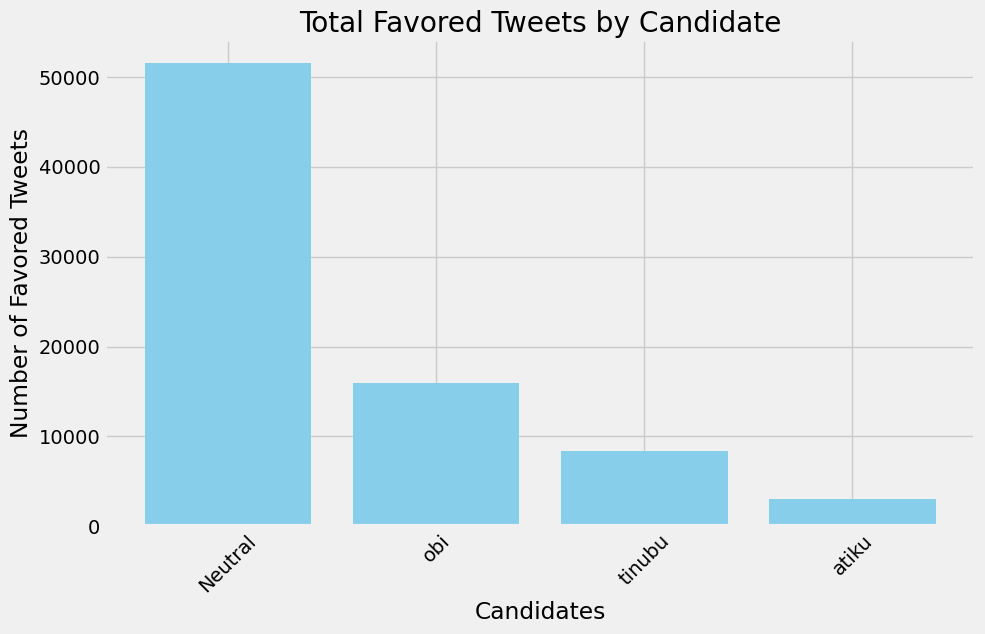

<Figure size 640x480 with 0 Axes>

In [21]:
# Count the number of favored tweets for each candidate
candidate_counts = df['candidate'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(candidate_counts.index, candidate_counts.values, color='skyblue')
plt.xlabel('Candidates')
plt.ylabel('Number of Favored Tweets')
plt.title('Total Favored Tweets by Candidate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
plt.savefig('sentiment_images\Total Favored Tweets by Candidate.png')

# # Visualization of Tweet by RoBERTa Model

In [22]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,preprocessed_text,tokens,candidate
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244.0,999.0,686.0,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,0.0,obi and wife storm kastina state today.see cro...,"[obi, and, wife, storm, kastina, state, today....",obi
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688.0,2827.0,3488.0,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,0.0,"if they can’t point to you one project , inves...","[if, they, can, ’, t, point, to, you, one, pro...",atiku
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2.0,22.0,40.0,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,0.0,user god with his infinite mercy will never al...,"[user, god, with, his, infinite, mercy, will, ...",Neutral
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474.0,1931.0,129947.0,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,0.0,governor user takes asiwaju bola ahmed tinubu'...,"[governor, user, takes, asiwaju, bola, ahmed, ...",tinubu
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22.0,198.0,540.0,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,0.0,user salutation is not love. obi is coming,"[user, salutation, is, not, love, ., obi, is, ...",obi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78941,1633400835077177088.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4887376.0,161.0,745.0,True,2023-03-08 09:34:40+00:00,"From mobile banking to e-learning, digital inn...",NaN,Twitter for iPhone,24.0,96.0,0.0,"from mobile banking to e-learning, digital inn...","[from, mobile, banking, to, e-learning, ,, dig...",atiku
78942,1633400829591052288.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4887376.0,161.0,745.0,True,2023-03-08 09:34:39+00:00,"In Nigeria, women face numerous challenges, in...",NaN,Twitter for iPhone,25.0,93.0,0.0,"in nigeria, women face numerous challenges, in...","[in, nigeria, ,, women, face, numerous, challe...",atiku
78943,1633400824448548864.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4887376.0,161.0,745.0,True,2023-03-08 09:34:38+00:00,"Today, we recognise the potential of technolog...",NaN,Twitter for iPhone,28.0,103.0,0.0,"today, we recognise the potential of technolog...","[today, ,, we, recognise, the, potential, of, ...",atiku
78944,1633400819641991168.0,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4887376.0,161.0,745.0,True,2023-03-08 09:34:37+00:00,I join women around the world and particularly...,NaN,Twitter for iPhone,274.0,1728.0,0.0,i join women around the world and particularly...,"[i, join, women, around, the, world, and, part...",atiku


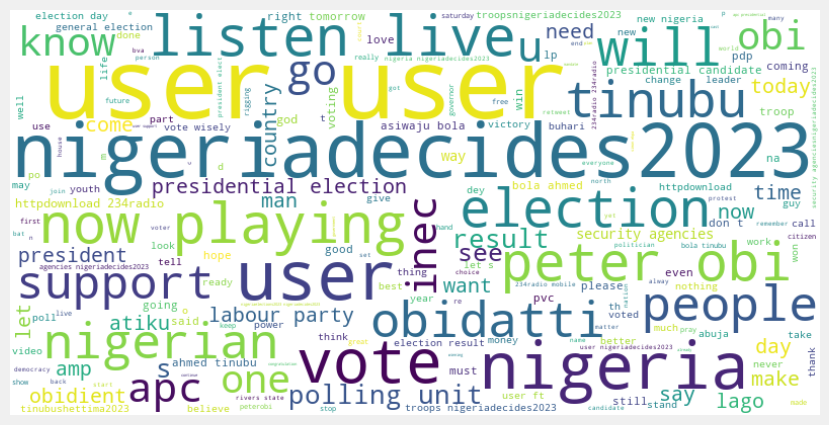

In [23]:
#Check word Cloud 
from wordcloud import WordCloud

# Combine all the cleaned text into a single string
all_text = " ".join(df['preprocessed_text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

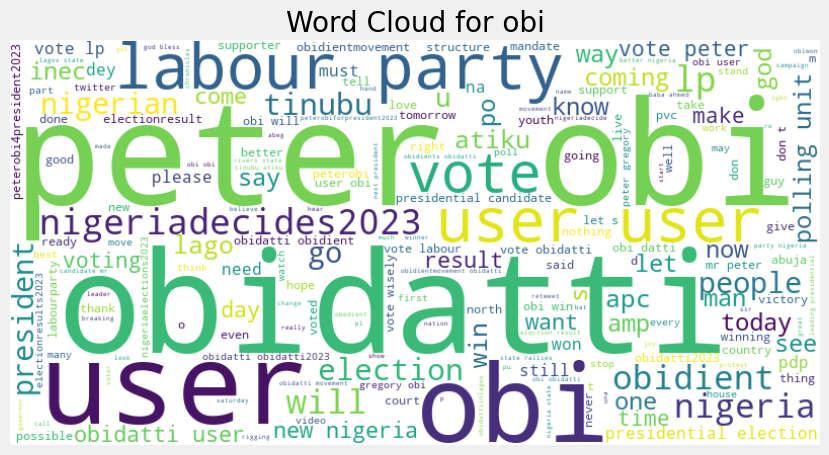

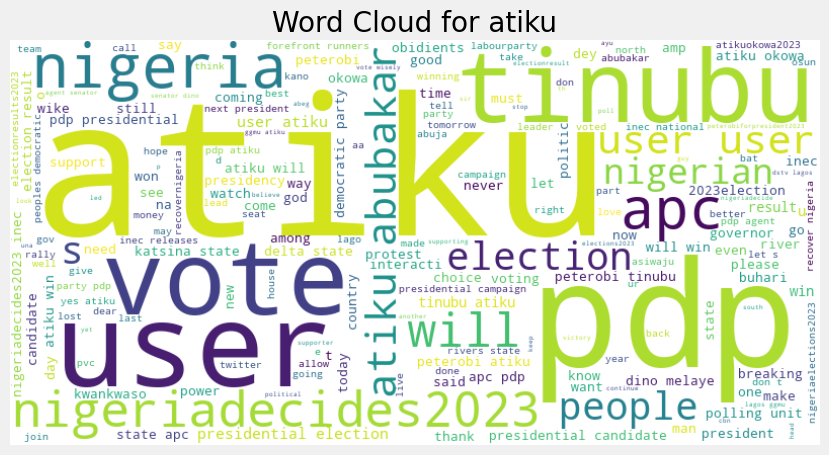

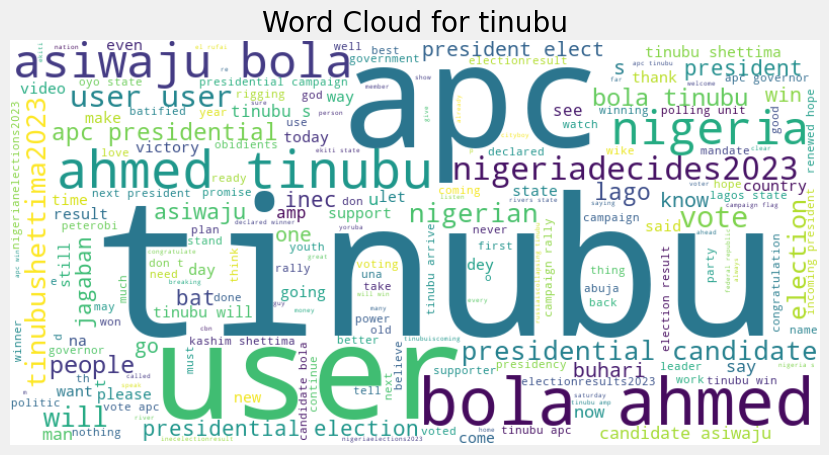

In [24]:
# Generate WordCloud for each of the candidates
candidates = ['obi', 'atiku', 'tinubu']

# Create word clouds for each candidate
for candidate in candidates:
    # Filter the DataFrame to select only tweets that favor the current candidate
    candidate_tweets = df[df['candidate'] == candidate]
    
    # Combine the text of all tweets into a single string
    text = ' '.join(candidate_tweets['preprocessed_text'])
    
    # Generate a word cloud for the candidate's tweets
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {candidate}')
    plt.axis('off')
    plt.show()

# Sentiment Analysis Using VADER

In [25]:
# Initialize the sentiment analyzer (VADER)
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment for a list of tokens
def analyze_tokens(tokens):
    sentiment_scores = {'positive': 0, 'neutral': 0, 'negative': 0}
    for token in tokens:
        sentiment = analyzer.polarity_scores(token)
        if sentiment['compound'] >= 0.05:
            sentiment_scores['positive'] += 1
        elif sentiment['compound'] <= -0.05:
            sentiment_scores['negative'] += 1
        else:
            sentiment_scores['neutral'] += 1
    return sentiment_scores

# Apply sentiment analysis to each row in the DataFrame
df['token_sentiments'] = df['tokens'].apply(analyze_tokens)

# Calculate the overall sentiment for each row based on token sentiments
def calculate_overall_sentiment(token_sentiments):
    if token_sentiments['positive'] > token_sentiments['negative']:
        return 'positive'
    elif token_sentiments['negative'] > token_sentiments['positive']:
        return 'negative'
    else:
        return 'neutral'

df['overall_sentiment'] = df['token_sentiments'].apply(calculate_overall_sentiment)

# Print or save the DataFrame with sentiment analysis results
print(df[['preprocessed_text', 'tokens', 'overall_sentiment']])

                                       preprocessed_text  \
0      obi and wife storm kastina state today.see cro...   
1      if they can’t point to you one project , inves...   
2      user god with his infinite mercy will never al...   
3      governor user takes asiwaju bola ahmed tinubu'...   
4             user salutation is not love. obi is coming   
...                                                  ...   
78941  from mobile banking to e-learning, digital inn...   
78942  in nigeria, women face numerous challenges, in...   
78943  today, we recognise the potential of technolog...   
78944  i join women around the world and particularly...   
78945  today, i led a peaceful protest to the headqua...   

                                                  tokens overall_sentiment  
0      [obi, and, wife, storm, kastina, state, today....          positive  
1      [if, they, can, ’, t, point, to, you, one, pro...          positive  
2      [user, god, with, his, infinite, mercy, w

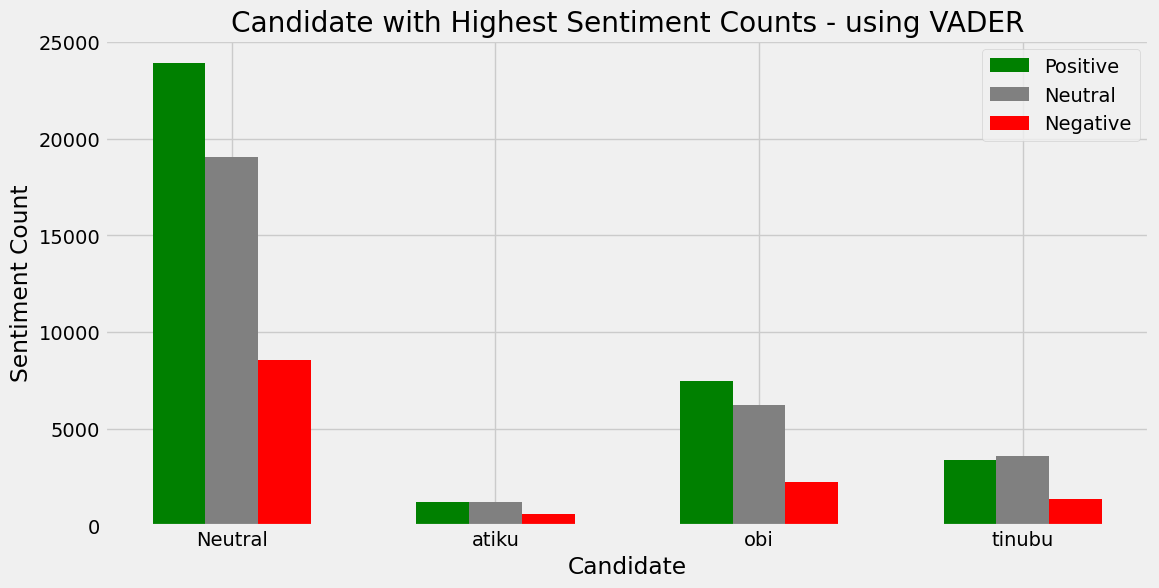

In [27]:
# Group by 'user_name' and 'Predicted_Sentiment_Label', then count the occurrences
label_counts = df.groupby(['candidate', 'overall_sentiment']).size().unstack(fill_value=0)

# Determine the candidate with the highest count for each sentiment category
candidate_highest_positive = label_counts['positive'].idxmax()
candidate_highest_neutral = label_counts['neutral'].idxmax()
candidate_highest_negative = label_counts['negative'].idxmax()

# Create a bar chart with side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions for each set of bars
positions_positive = np.arange(len(label_counts))
positions_neutral = positions_positive + bar_width
positions_negative = positions_positive + 2 * bar_width

# Plot positive sentiment
ax.bar(positions_positive, label_counts['positive'], width=bar_width, label='Positive', color='green')

# Plot neutral sentiment
ax.bar(positions_neutral, label_counts['neutral'], width=bar_width, label='Neutral', color='gray')

# Plot negative sentiment
ax.bar(positions_negative, label_counts['negative'], width=bar_width, label='Negative', color='red')

# Set labels and title
ax.set_xlabel('Candidate')
ax.set_ylabel('Sentiment Count')
ax.set_title('Candidate with Highest Sentiment Counts - using VADER')
ax.set_xticks(positions_positive + bar_width)
ax.set_xticklabels(label_counts.index)
ax.legend()

# Show the plot
plt.show()

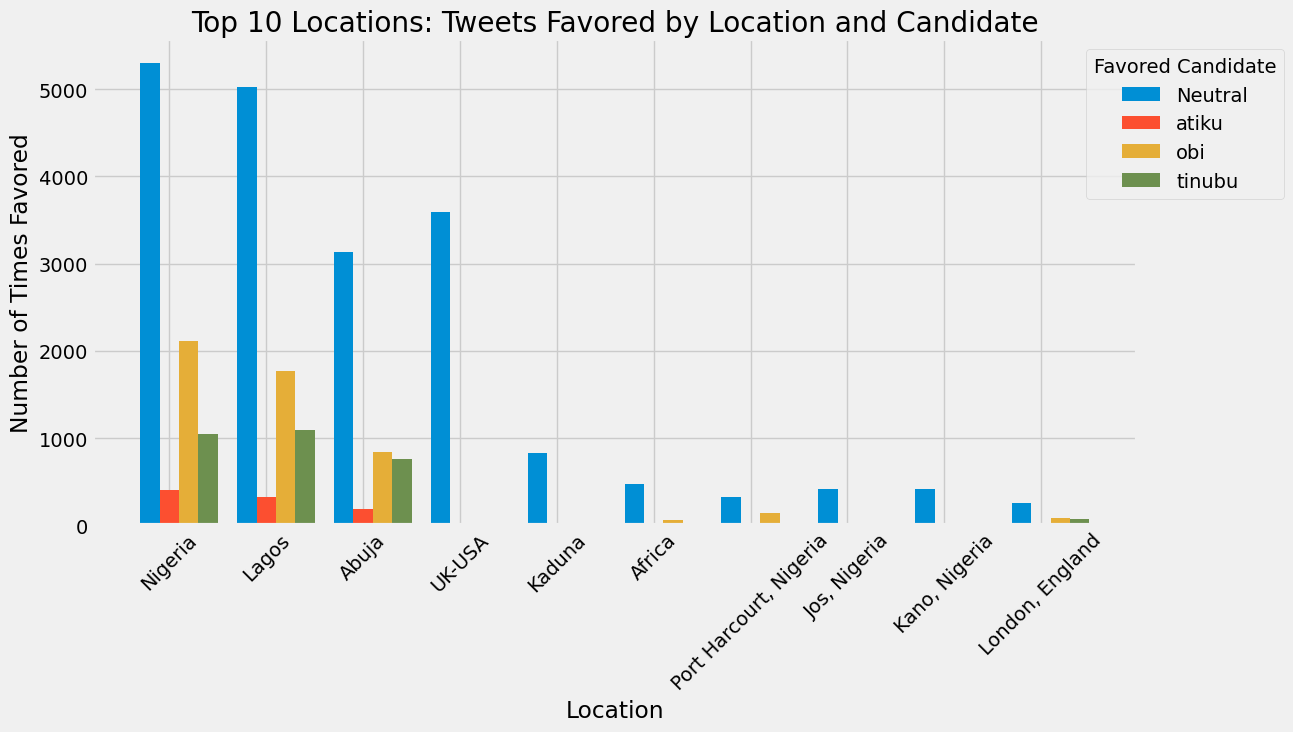

In [28]:
# Group the data by 'location' and 'favored_candidate' and count the occurrences

location_mapping = {
    'Nigeria': 'Nigeria',
    'Nig': 'Nigeria',
    'Federal Capital Territory': 'Abuja',
    'Abuja, Nigeria': 'Abuja', 
    'Federal Capital Territory, Nig': 'Abuja',
    'Nigeria ': 'Nigeria',
    'Lagos, Nigeria': 'Lagos',
    'Kaduna, Nigeria': 'Kaduna',
    'UK, USA, South Africa, Nigeria': 'UK-USA',
    # Add more mappings as needed
}

df['user_location'] = df['user_location'].replace(location_mapping)

location_candidate_counts = df.groupby(['user_location', 'candidate']).size().unstack(fill_value=0)

# Sort the locations by total favored tweets and select the top 10
location_totals = location_candidate_counts.sum(axis=1).sort_values(ascending=False)
top_10_locations = location_totals.head(10).index

# Filter the DataFrame to include only the top 10 locations
df_filt = df[df['user_location'].isin(top_10_locations)]

# Create a grouped bar chart for each location
candidate_labels = location_candidate_counts.columns
x = range(len(top_10_locations))
width = 0.2

# Plot the distribution of tweets across locations for each candidate
plt.figure(figsize=(12, 6))

# Get the unique candidates in the dataset
candidates = df['candidate'].unique()

for i, candidate in enumerate(candidate_labels):
    counts = []
    for loc in top_10_locations:
        counts.append(location_candidate_counts.at[loc, candidate])

    plt.bar([pos + i * width for pos in x], counts, width=width, label=candidate)

plt.xlabel('Location')
plt.ylabel('Number of Times Favored')
plt.title('Top 10 Locations: Tweets Favored by Location and Candidate')
plt.xticks([pos + width for pos in x], top_10_locations, rotation=45)
plt.legend(title='Favored Candidate', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

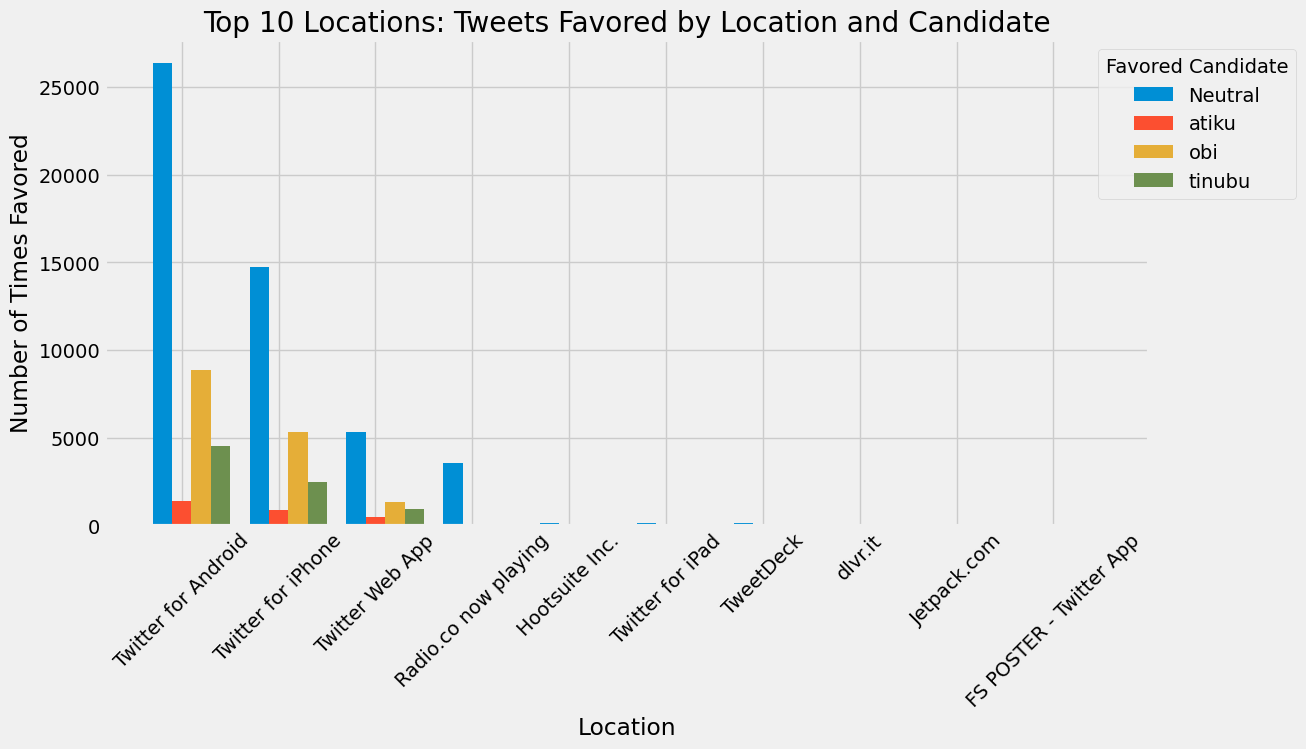

In [29]:
# Group the data by 'location' and 'favored_candidate' and count the occurrences

location_mapping = {
    'Nigeria': 'Nigeria',
    'Nig': 'Nigeria',
    'Federal Capital Territory': 'Abuja',
    'Abuja, Nigeria': 'Abuja', 
    'Federal Capital Territory, Nig': 'Abuja',
    'Nigeria ': 'Nigeria',
    'Lagos, Nigeria': 'Lagos',
    # Add more mappings as needed
}

#df['source'] = df['source'].replace(location_mapping)

location_candidate_counts = df.groupby(['source', 'candidate']).size().unstack(fill_value=0)

# Sort the locations by total favored tweets and select the top 10
location_totals = location_candidate_counts.sum(axis=1).sort_values(ascending=False)
top_10_locations = location_totals.head(10).index

# Filter the DataFrame to include only the top 10 locations
df_filt = df[df['source'].isin(top_10_locations)]

# Create a grouped bar chart for each location
candidate_labels = location_candidate_counts.columns
x = range(len(top_10_locations))
width = 0.2

# Plot the distribution of tweets across locations for each candidate
plt.figure(figsize=(12, 6))

# Get the unique candidates in the dataset
candidates = df['candidate'].unique()

for i, candidate in enumerate(candidate_labels):
    counts = []
    for loc in top_10_locations:
        counts.append(location_candidate_counts.at[loc, candidate])

    plt.bar([pos + i * width for pos in x], counts, width=width, label=candidate)

plt.xlabel('Location')
plt.ylabel('Number of Times Favored')
plt.title('Top 10 Locations: Tweets Favored by Location and Candidate')
plt.xticks([pos + width for pos in x], top_10_locations, rotation=45)
plt.legend(title='Favored Candidate', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

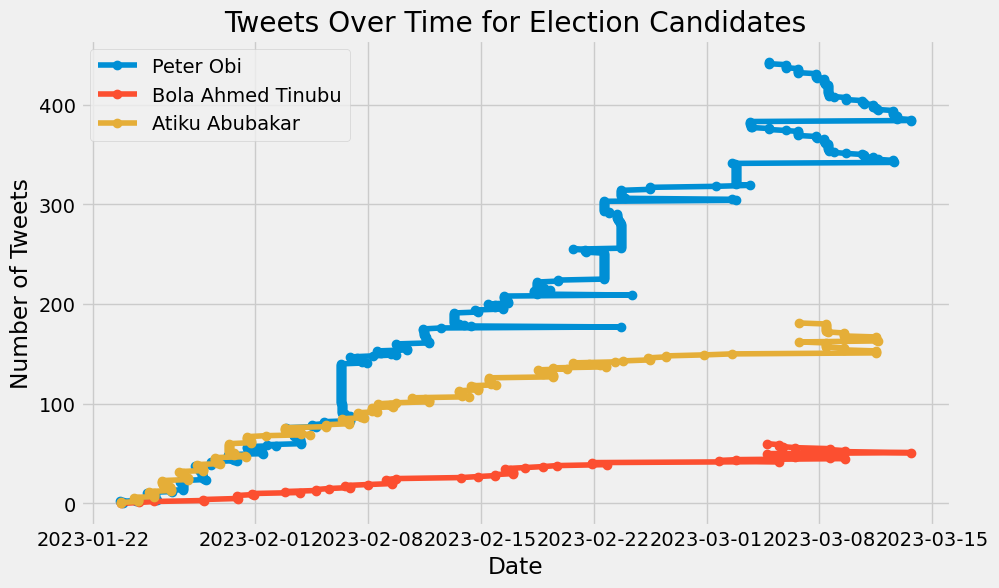

In [30]:
# List of candidate names
candidates = ['Peter Obi', 'Bola Ahmed Tinubu', 'Atiku Abubakar']

# Filter the DataFrame to include only the candidate rows
candidates_df = df[df['user_name'].isin(candidates)]

# Plot the line chart for candidates
plt.figure(figsize=(10, 6))

for candidate in candidates:
    candidate_data = candidates_df[candidates_df['user_name'] == candidate]
    plt.plot(candidate_data['date'], range(len(candidate_data)), label=candidate, marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweets Over Time for Election Candidates')

# Display legend
plt.legend()

# Show the plot
plt.show()


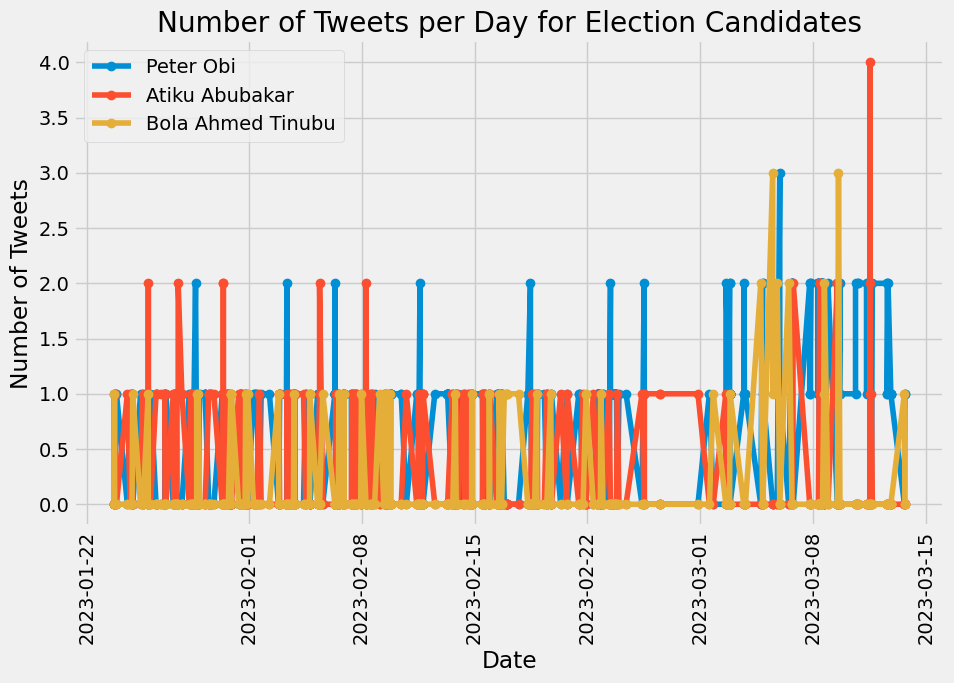

In [31]:
# Plot candidate per day of the month

# List of candidate names
candidates = ['Peter Obi', 'Atiku Abubakar', 'Bola Ahmed Tinubu']

# Filter the DataFrame to include only the candidate rows
candidates_df = df[df['user_name'].isin(candidates)]

# Group the data by date and candidate, counting the number of tweets
grouped_df = candidates_df.groupby(['date', 'user_name']).size().unstack(fill_value=0)

# Plot the line chart for candidates
plt.figure(figsize=(10, 6))

for candidate in candidates:
    plt.plot(grouped_df.index, grouped_df[candidate], label=candidate, marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day for Election Candidates')

# Display legend
plt.legend()
# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


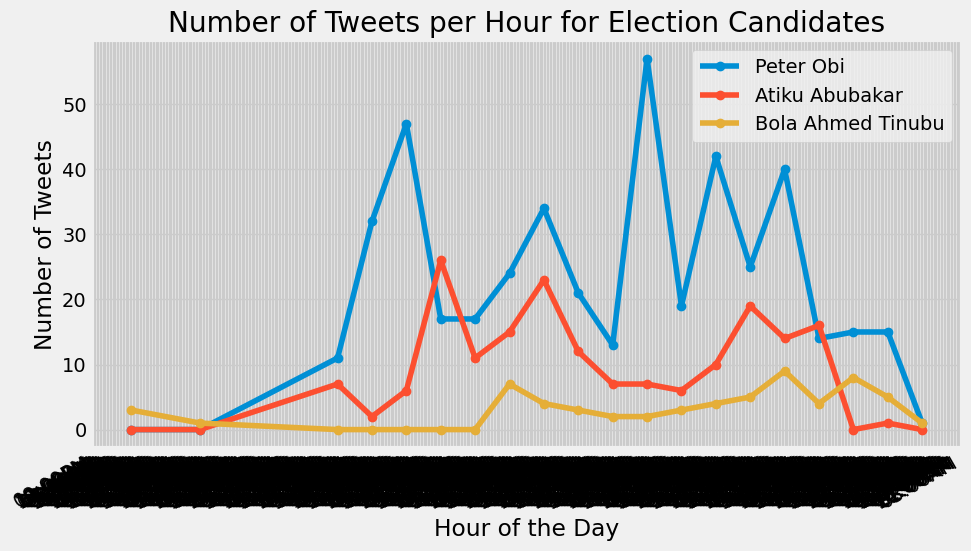

In [32]:
import matplotlib.dates as mdates

# Assuming 'date' is already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame to include only the candidate rows
candidates_df = df[df['user_name'].isin(candidates)]

# Extract the hour from the 'Date' column
candidates_df['hour'] = candidates_df['date'].dt.hour

# Group the data by hour and candidate, counting the number of tweets
grouped_df = candidates_df.groupby(['hour', 'user_name']).size().unstack(fill_value=0).reset_index()

# Plot the line chart for candidates
plt.figure(figsize=(10, 6))

for candidate in candidates:
    plt.plot(grouped_df['hour'], grouped_df[candidate], label=candidate, marker='o')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Hour for Election Candidates')

# Format the x-axis ticks to display hours in 12-hour format
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I:%M%p'))

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display legend
plt.legend()

# Show the plot
plt.show()


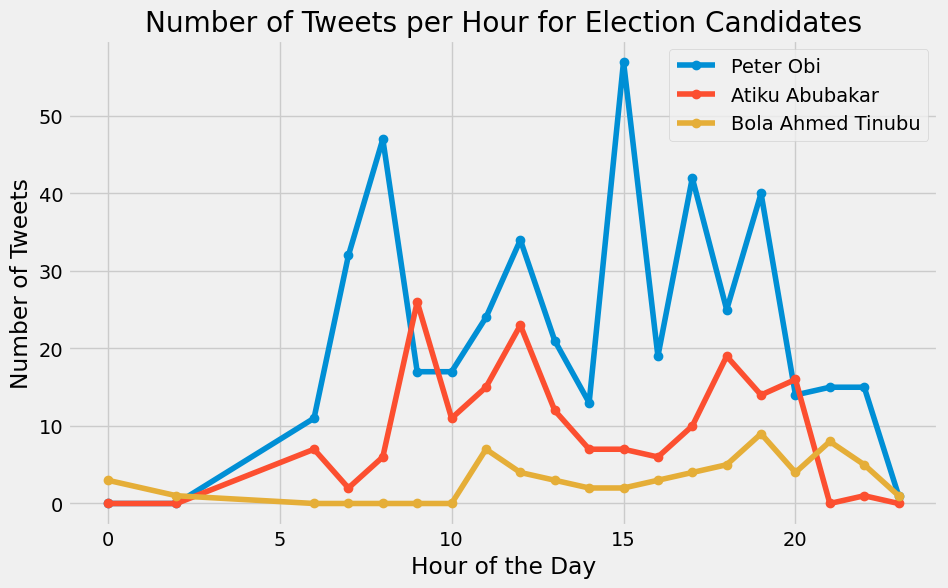

In [33]:
# Filter the DataFrame to include only the candidate rows
candidates_df = df[df['user_name'].isin(candidates)]

# Extract the hour from the 'Date' column
candidates_df['hour'] = candidates_df['date'].dt.hour

# Group the data by hour and candidate, counting the number of tweets
grouped_df = candidates_df.groupby(['hour', 'user_name']).size().unstack(fill_value=0)

# Plot the line chart for candidates
plt.figure(figsize=(10, 6))

for candidate in candidates:
    plt.plot(grouped_df.index, grouped_df[candidate], label=candidate, marker='o')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Hour for Election Candidates')

# Display legend
plt.legend()

# Show the plot
plt.show()

# # Sentiment Analysis

In [34]:
# Initialize the sentiment analyzer (VADER)
analyzer = SentimentIntensityAnalyzer()

# Define the list of candidates
candidates = ['atiku', 'obi', 'tinubu']

# Initialize dictionaries to store overall sentiment scores for each candidate
candidate_sentiments = {}

# Calculate the overall sentiment for each candidate
for candidate in candidates:
    candidate_df = df[df['candidate'] == candidate]
    overall_sentiment_scores = {'positive': 0, 'neutral': 0, 'negative': 0}

    for text in candidate_df['preprocessed_text']:
        sentiment = analyzer.polarity_scores(text)
        if sentiment['compound'] >= 0.05:
            overall_sentiment_scores['positive'] += 1
        elif sentiment['compound'] <= -0.05:
            overall_sentiment_scores['negative'] += 1
        else:
            overall_sentiment_scores['neutral'] += 1

    candidate_sentiments[candidate] = overall_sentiment_scores

# Create a DataFrame to summarize the overall sentiment
summary_df = pd.DataFrame(candidate_sentiments).T

# Print or further analyze the summary DataFrame
print(summary_df)

        positive  neutral  negative
atiku       1266     1073       706
obi         7781     5470      2738
tinubu      3625     3141      1605


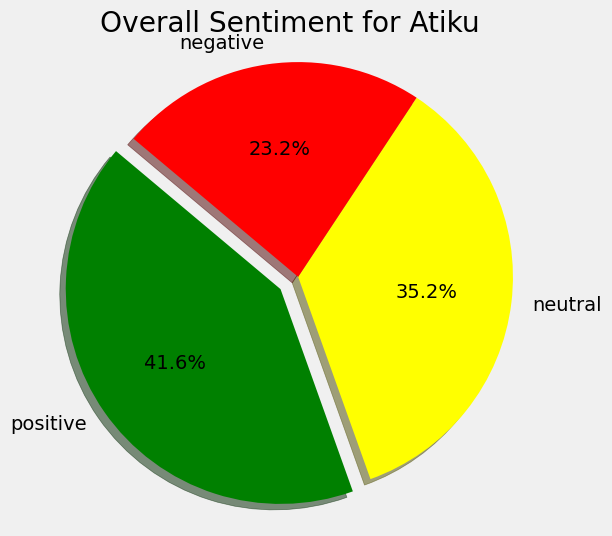

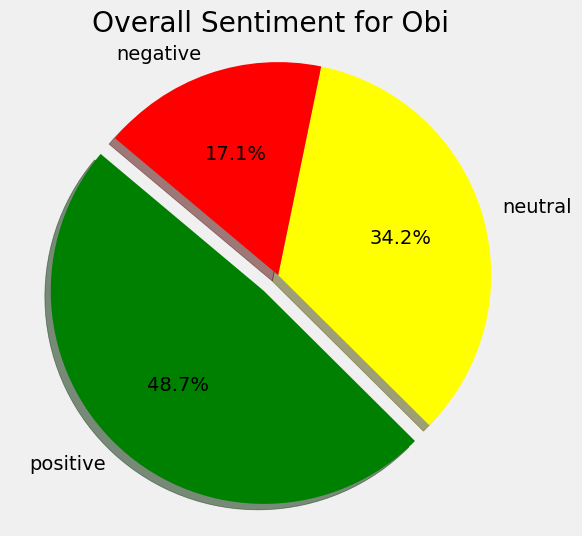

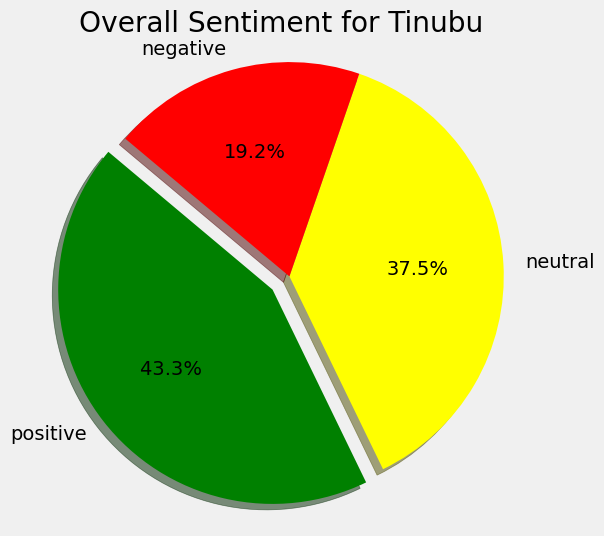

In [35]:
 #Load your DataFrame with the overall sentiment scores of the three candidates
# You can use the summary_df created in the previous response
# Make sure the DataFrame has columns for each candidate (e.g., 'Candidate A', 'Candidate B', 'Candidate C')

# Example DataFrame for demonstration purposes
data = {
    'Atiku': {'positive':  1266, 'neutral': 1073, 'negative': 706},
    'Obi': {'positive': 7781, 'neutral': 5470, 'negative': 2738},
    'Tinubu': {'positive': 3625, 'neutral': 3141, 'negative': 1605}
}

summary_df = pd.DataFrame(data)

# Create pie charts for each candidate's overall sentiment
candidates = summary_df.columns

for candidate in candidates:
    sentiment_scores = summary_df[candidate]
    labels = sentiment_scores.index
    sizes = sentiment_scores.values
    colors = ['green', 'yellow', 'red']
    explode = (0.1, 0, 0)  # Explode the 'positive' slice slightly for emphasis

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Overall Sentiment for {candidate}')
    plt.show()


# Sentiment Analysis Using RoBERTa Model

In [36]:
from transformers import pipeline

In [37]:
# Load the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to get sentiment using the model
def get_sentiment_batch(texts):
    results = sentiment_analyzer(texts)
    return [result['label'] for result in results]

# Batch processing by dividing the texts into chunks
batch_size = 100
num_batches = len(df) // batch_size + 1
sentiment_labels = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    texts_batch = df['preprocessed_text'].iloc[start_idx:end_idx].tolist()
    sentiment_labels += get_sentiment_batch(texts_batch)

# Map predicted labels to 'negative', 'neutral', 'positive'
sentiment_mapping = {'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'}
df['Predicted_Sentiment'] = [sentiment_mapping[label] for label in sentiment_labels]

# Display the DataFrame with predicted sentiment labels
print(df[['user_name', 'preprocessed_text', 'Predicted_Sentiment']])

# Optionally, you can save the preprocessed DataFrame to a new CSV file
df.to_csv('Desktop\preprocessed_tweets_dataset.csv', index=False)

                user_name                                  preprocessed_text  \
0           Fabulous Faga  obi and wife storm kastina state today.see cro...   
1      Patriotic Nigerian  if they can’t point to you one project , inves...   
2                 Promise  user god with his infinite mercy will never al...   
3                  KemKem  governor user takes asiwaju bola ahmed tinubu'...   
4                Mo'6icky         user salutation is not love. obi is coming   
...                   ...                                                ...   
78941      Atiku Abubakar  from mobile banking to e-learning, digital inn...   
78942      Atiku Abubakar  in nigeria, women face numerous challenges, in...   
78943      Atiku Abubakar  today, we recognise the potential of technolog...   
78944      Atiku Abubakar  i join women around the world and particularly...   
78945      Atiku Abubakar  today, i led a peaceful protest to the headqua...   

      Predicted_Sentiment  
0          

In [38]:
# Count the occurrences of each sentiment label for each candidate
sentiment_counts = df.groupby(['candidate', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Display the statistics
print("Sentiment Statistics for Each Candidate:")
print(sentiment_counts)

Sentiment Statistics for Each Candidate:
Predicted_Sentiment  negative  neutral  positive
candidate                                       
Neutral                 10304    32128      9091
atiku                     666     1918       461
obi                      2413     9556      4020
tinubu                   1741     5197      1433


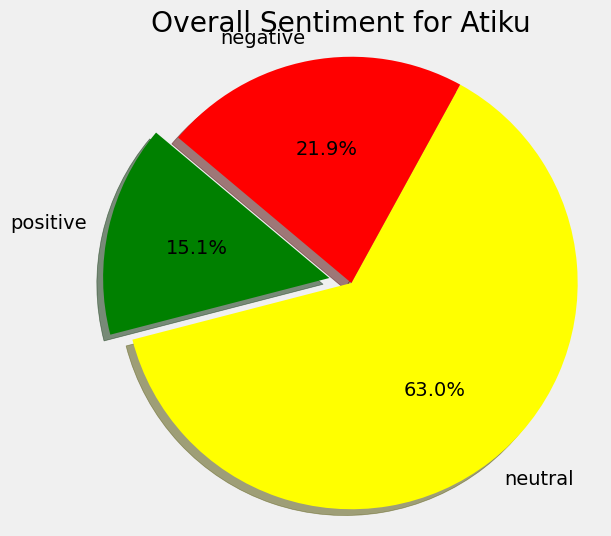

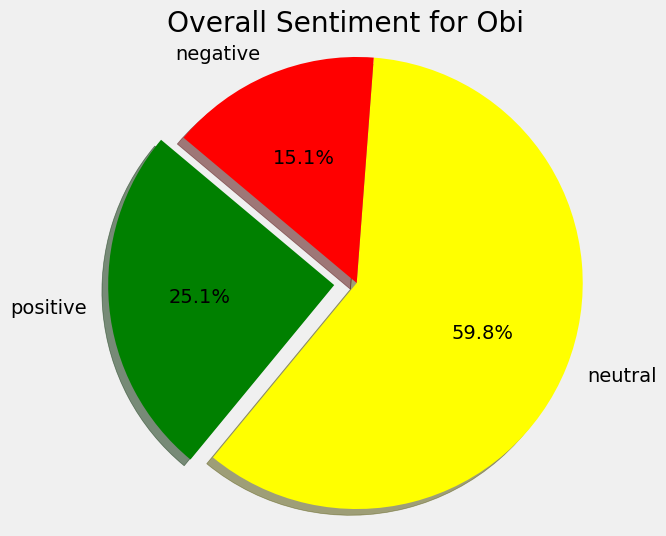

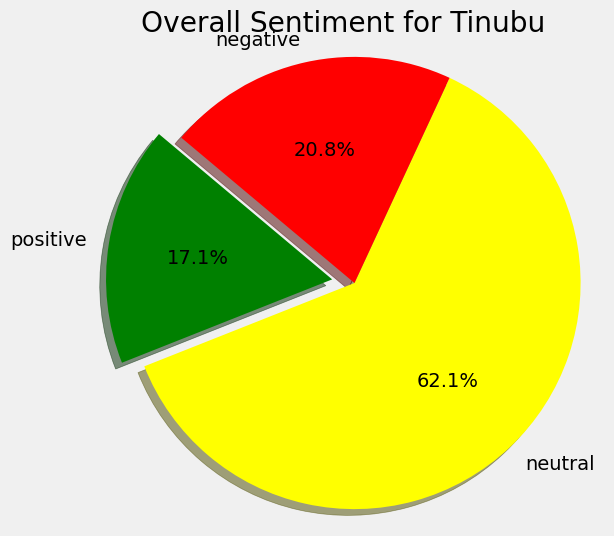

In [39]:
# Example DataFrame for demonstration purposes
data = {
    'Atiku': {'positive': 461, 'neutral': 1918, 'negative': 666},
    'Obi': {'positive': 4020, 'neutral': 9556, 'negative': 2413},
    'Tinubu': {'positive': 1433, 'neutral': 5197, 'negative': 1741}
}

summary_df = pd.DataFrame(data)

# Create pie charts for each candidate's overall sentiment
candidates = summary_df.columns

for candidate in candidates:
    sentiment_scores = summary_df[candidate]
    labels = sentiment_scores.index
    sizes = sentiment_scores.values
    colors = ['green', 'yellow', 'red']
    explode = (0.1, 0, 0)  # Explode the 'positive' slice slightly for emphasis

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Overall Sentiment for {candidate}')
    plt.show()


# # 

In [55]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'obi'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'positive')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
0           obi   
20          obi   
216         obi   
305         obi   
306         obi   
...         ...   
78918       obi   
78920       obi   
78921       obi   
78923       obi   
78926       obi   

                                                                                                                         preprocessed_text  \
0                                obi and wife storm kastina state today.see crowd. nigeria will be great again retweet if you believe http   
20                                                       the kind of transparency we need ❤️😂peterobi4president2023 obedient obidatti http   
216                           user mr. peter obi has the endorsement of the great afenifere,ohanaeze ndigbo,igbo elders consultative… http   
305              "let's support a leader with a proven track record of success. peter obi has the experience and vision to take nige… http   
306                                                          

In [40]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'obi'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'neutral')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
12          obi   
14          obi   
16          obi   
21          obi   
23          obi   
...         ...   
78910       obi   
78916       obi   
78919       obi   
78924       obi   
78925       obi   

                                                                                                               preprocessed_text  \
12                                                                                                  hmmm just vote obidatti http   
14                                                  user user user user user just a reminder 🎗️obidatti wike tinubuinbauchi http   
16            user why talking about kwankwaso and obi? tell nigerians about atiku. do your job to the very last day of fe… http   
21     of all the presdential flag-bearers,only mr obi hve the needed mindset t work t get nig free frm it's present econo… http   
23                         user user sola i support obidatti....we need money to flag up our president campaign

In [42]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'obi'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'negative')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
4           obi   
18          obi   
45          obi   
157         obi   
162         obi   
...         ...   
78890       obi   
78897       obi   
78904       obi   
78917       obi   
78922       obi   

                                                                                                                                 preprocessed_text  \
4                                                                                                       user salutation is not love. obi is coming   
18                        so this evening in lagos, i was almost beaten by elderly people for supporting obidatti. a woman among them said "… http   
45                         can we really trust peter obi? can we thrust the affairs of this country in his hands ?do not let your emotions b… http   
157                       you don't hide to support good thing. you only hide when you know what you're supporting is bad. i'm obidient with… http   
162                  

In [43]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'atiku'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'positive')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
6         atiku   
315       atiku   
1033      atiku   
1355      atiku   
1478      atiku   
...         ...   
78937     atiku   
78938     atiku   
78941     atiku   
78943     atiku   
78944     atiku   

                                                                                                                preprocessed_text  \
6                 earlier today in bayelsa for atiku/okowa presidential campaign rally.thank you bayelsa.pdp atikuinbayelsa… http   
315                                                        god: i am the only one that makes kings. user user user user user http   
1033                   thank god for january 🙏🙏🙏i won big in january 💃🕺💃🕺...february be more fruitful.newnairanotes pdp pvc… http   
1355    atiku supporters have been the most civil in the build up to the election (especially in the face of constant provo… http   
1478    on behalf of my team, i want to extend a special appreciation to the chairman of the council, iben

In [44]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'atiku'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'neutral')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])

      candidate  \
1         atiku   
5         atiku   
7         atiku   
8         atiku   
9         atiku   
...         ...   
78929     atiku   
78933     atiku   
78934     atiku   
78940     atiku   
78945     atiku   

                                                                                                               preprocessed_text  \
1        if they can’t point to you one project , investment, vision, legacies of either peterobi or atiku, then they don’… http   
5                  user don drop part 3! the insiders have confessed that atiku is going nowhere! you all are waiting to w… http   
7      atiku abubakar, the party's candidate, will win the upcoming election for president of nigeria, according to mr. de… http   
8                            atiku in bayelsa: niger delta shouldn’t beg fg for everything — region needs restructuringhttp http   
9      it is home coming for his excellency atiku abubakar n his recovering team to delta state 2moro 24th jan.

In [45]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'atiku'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'negative')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
125       atiku   
314       atiku   
494       atiku   
782       atiku   
968       atiku   
...         ...   
78930     atiku   
78931     atiku   
78935     atiku   
78939     atiku   
78942     atiku   

                                                                                                               preprocessed_text  \
125                                 okowa: you are a betrayer of southern nigeria – edwin clark httpdelta thursdaythoughts… http   
314                                                 uniport denies approving facility for atiku’s campaignhttpnigeriadecides2023   
494    all the evil plots by osun pdp led by adeleke to deter apc members and supporters from attending today’s presidenti… http   
782       danger alert☢nigerians please recieve sense o, we get this one wrong we're done for.pos pvc inec tinubu atiku pe… http   
968           atiku said he is corrupt. while defining corruption. kindly watch and hear him.😷own goal...nigeri

In [46]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'tinubu'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'positive')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
41       tinubu   
52       tinubu   
70       tinubu   
131      tinubu   
135      tinubu   
...         ...   
78861    tinubu   
78862    tinubu   
78864    tinubu   
78865    tinubu   
78866    tinubu   

                                                                                                               preprocessed_text  \
41                       user on behalf of the entire nigerian youths, i endorse your presidential candidacy. tinubushettima2023   
52       the campaign rally in osun state today is called serubawon and jawonlaya.thank you osun!!!asiwaju bola ahmed tinu… http   
70                        drone shots of tinubuinosun today. beautiful sight to behold. tinubu is coming.nigeriadecides2023 http   
131                  organic voters all over..for tinubu/shettima it's a winning streak ♾♾..tinubuinosun nigeriadecides2023 http   
135            asiwaju for a reason! celebrating our deserving win in grand styles.. ♾♾.    tinubuinosun nigeri

In [49]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'tinubu'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['Predicted_Sentiment'] == 'neutral')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])


      candidate  \
3        tinubu   
40       tinubu   
47       tinubu   
108      tinubu   
150      tinubu   
...         ...   
78832    tinubu   
78852    tinubu   
78858    tinubu   
78859    tinubu   
78863    tinubu   

                                                                                                                   preprocessed_text  \
3                                   governor user takes asiwaju bola ahmed tinubu's campaign to ondo south.from north to south… http   
40                                                                user if you are voting for apc retweet and like tinubushettima2023   
47           anytime you hear operation still water, the mind immediately goes to tinubu and mc oluomo mc oluomo, your time is… http   
108    asiwaju user will win but his enemies will try nigeriadecides2023 you dont reveal your plans too early for a man like asiwaju   
150            tinubu supporters shouting - 'if our candidate wins blaa blaa blaa.... if ti

In [52]:
# Assuming df is your DataFrame with columns 'favored_candidate', 'preprocessed_text', and 'Predicted_Sentiment'

pd.set_option('display.max_colwidth', None)
# Specify the candidate whose tweets you want to retrieve
candidate_to_fetch = 'tinubu'

# Filter for positive tweets of the specified candidate
positive_tweets_df = df[(df['candidate'] == candidate_to_fetch) & (df['overall_sentiment'] == 'negative')]

# Display the DataFrame with positive tweets and preprocessed text
print(positive_tweets_df[['candidate', 'preprocessed_text', 'Predicted_Sentiment']])

      candidate  \
34       tinubu   
57       tinubu   
248      tinubu   
307      tinubu   
390      tinubu   
...         ...   
78821    tinubu   
78834    tinubu   
78839    tinubu   
78858    tinubu   
78859    tinubu   

                                                                                                               preprocessed_text  \
34      apc campaign in bauchi flopped because the gods never wanted bauchi people to hear the lies that buhari and tinubu… http   
57                 user user tinubu hired fake bishops, fake imam, fake afenifere endorsement; one man o! state capture to… http   
248      i have a responsibility to be here. i am the man who can lead this country through the difficult times. ~ asiwaju… http   
307       alarm!alarm!alarm! the desperation of jagaban is becoming very unbecoming o! i saw it o! obidattiinzamfara victo… http   
390      no among of political sabotage will stop northerners from voting for asiwaju bola ahmed tinubu.norther

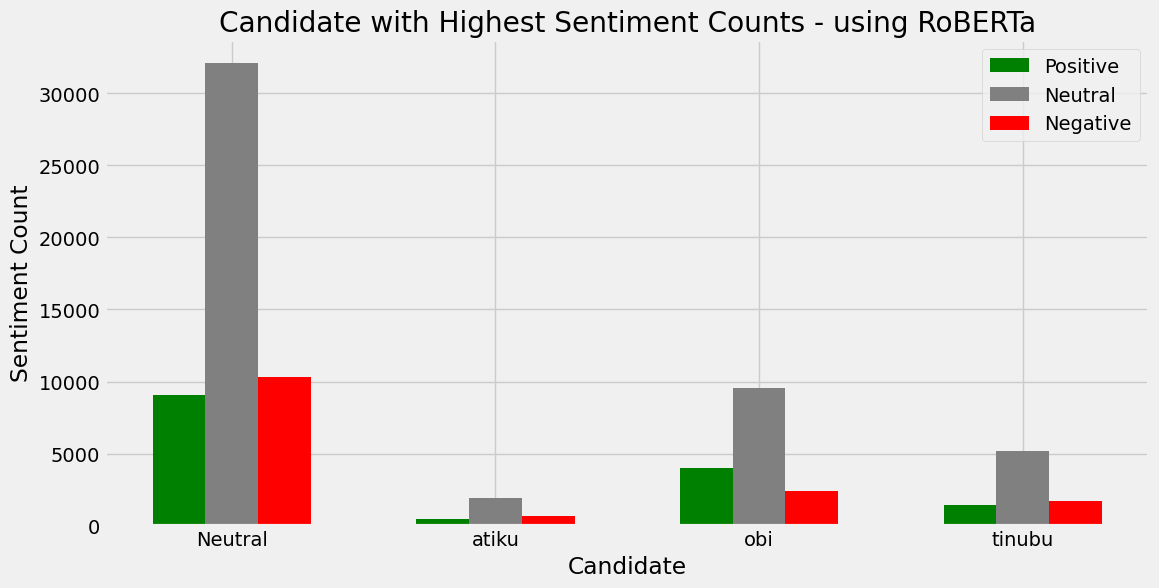

In [53]:
# Group by 'user_name' and 'Predicted_Sentiment_Label', then count the occurrences
label_counts = df.groupby(['candidate', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Determine the candidate with the highest count for each sentiment category
candidate_highest_positive = label_counts['positive'].idxmax()
candidate_highest_neutral = label_counts['neutral'].idxmax()
candidate_highest_negative = label_counts['negative'].idxmax()

# Create a bar chart with side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions for each set of bars
positions_positive = np.arange(len(label_counts))
positions_neutral = positions_positive + bar_width
positions_negative = positions_positive + 2 * bar_width

# Plot positive sentiment
ax.bar(positions_positive, label_counts['positive'], width=bar_width, label='Positive', color='green')

# Plot neutral sentiment
ax.bar(positions_neutral, label_counts['neutral'], width=bar_width, label='Neutral', color='gray')

# Plot negative sentiment
ax.bar(positions_negative, label_counts['negative'], width=bar_width, label='Negative', color='red')

# Set labels and title
ax.set_xlabel('Candidate')
ax.set_ylabel('Sentiment Count')
ax.set_title('Candidate with Highest Sentiment Counts - using RoBERTa')
ax.set_xticks(positions_positive + bar_width)
ax.set_xticklabels(label_counts.index)
ax.legend()

# Show the plot
plt.show()